In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
import tensorflow as tf
#import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

2023-02-08 10:57:28.357511: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("/Users/martinbordeau/Downloads/table_complete.csv", sep=",")

In [3]:
df=df.rename(columns={'diff': 'diff_DZ10_AME'})

In [4]:
target = df["BE/A_AME"]
n_input=df["N"]
z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_n=scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z=scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))
scaled_target=scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [5]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
merged = keras.layers.Concatenate()([input1, input2])
dense1 = keras.layers.Dense(64, input_dim=2, activation="relu")(merged)
dense2 = keras.layers.Dense(64, activation="relu")(dense1)
dense3 = keras.layers.Dense(64, activation="relu")(dense2)
dense4 = keras.layers.Dense(64, activation="relu")(dense3)
output = keras.layers.Dense(1, activation="relu")(dense4)
model4 = keras.models.Model(([input1, input2]),output)

2023-02-08 10:57:30.949219: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/150
277/277 - 0s - loss: 0.1969 - 374ms/epoch - 1ms/step
Epoch 2/150
277/277 - 0s - loss: 0.0217 - 140ms/epoch - 505us/step
Epoch 3/150
277/277 - 0s - loss: 0.0048 - 167ms/epoch - 602us/step
Epoch 4/150
277/277 - 0s - loss: 0.0033 - 159ms/epoch - 575us/step
Epoch 5/150
277/277 - 0s - loss: 0.0026 - 143ms/epoch - 516us/step
Epoch 6/150
277/277 - 0s - loss: 0.0022 - 139ms/epoch - 503us/step
Epoch 7/150
277/277 - 0s - loss: 0.0019 - 156ms/epoch - 562us/step
Epoch 8/150
277/277 - 0s - loss: 0.0017 - 148ms/epoch - 536us/step
Epoch 9/150
277/277 - 0s - loss: 0.0014 - 143ms/epoch - 517us/step
Epoch 10/150
277/277 - 0s - loss: 0.0013 - 140ms/epoch - 506us/step
Epoch 11/150
277/277 - 0s - loss: 0.0011 - 150ms/epoch - 543us/step
Epoch 12/150
277/277 - 0s - loss: 0.0010 - 160ms/epoch - 578us/step
Epoch 13/150
277/277 - 0s - loss: 9.3260e-04 - 147ms/epoch - 530us/step
Epoch 14/150
277/277 - 0s - loss: 8.3684e-04 - 146ms/epoch - 528us/step
Epoch 15/150
277/277 - 0s - loss: 7.3409e-04 - 144m

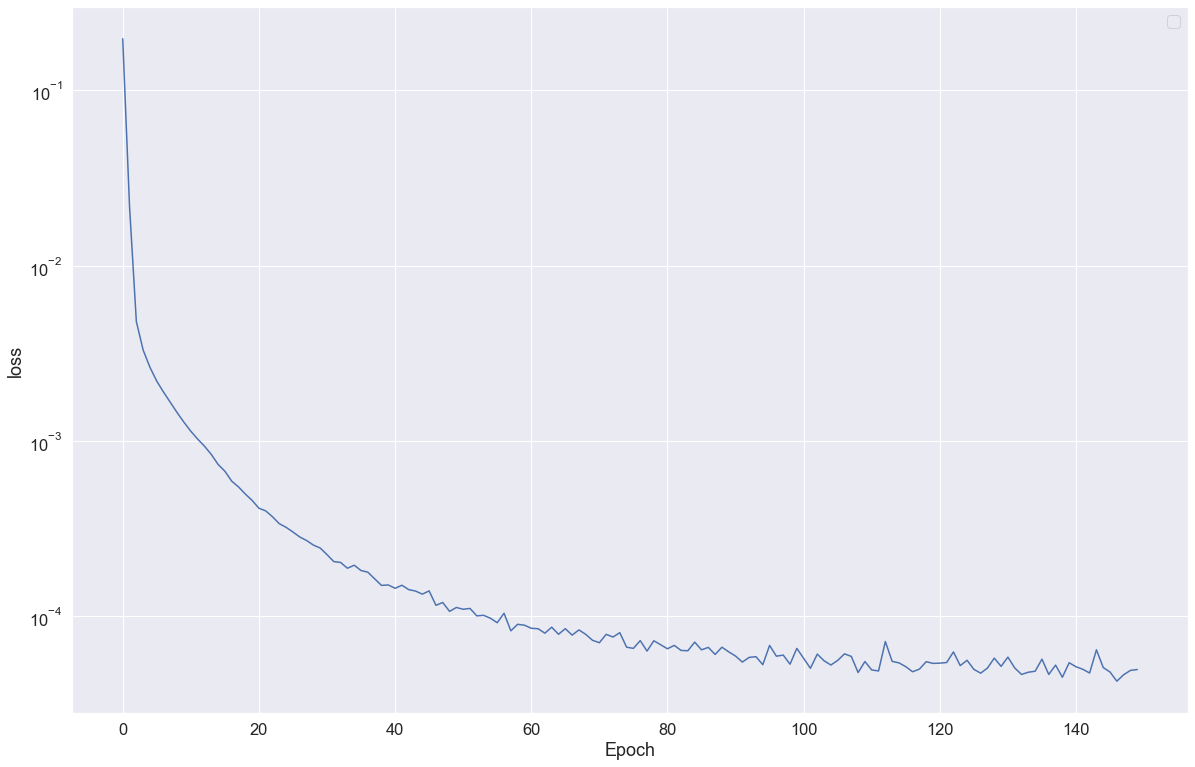

In [7]:
history4=model4.fit(x=([scaled_n,scaled_z]), y=scaled_target,batch_size=11, epochs=150, shuffle=True, verbose=2)

plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

In [9]:
df['BE/A_AME']=df['BE/A_AME']/1000

test_target = df["BE/A_AME"]
test_n_input=df["N"]
test_z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1, verbose=0) ## we use the model 4

<AxesSubplot:title={'center':'Difference_AME between BE/A_AME(exp) and BE/A_AME(predicted)'}, xlabel='A', ylabel='Difference_AME'>

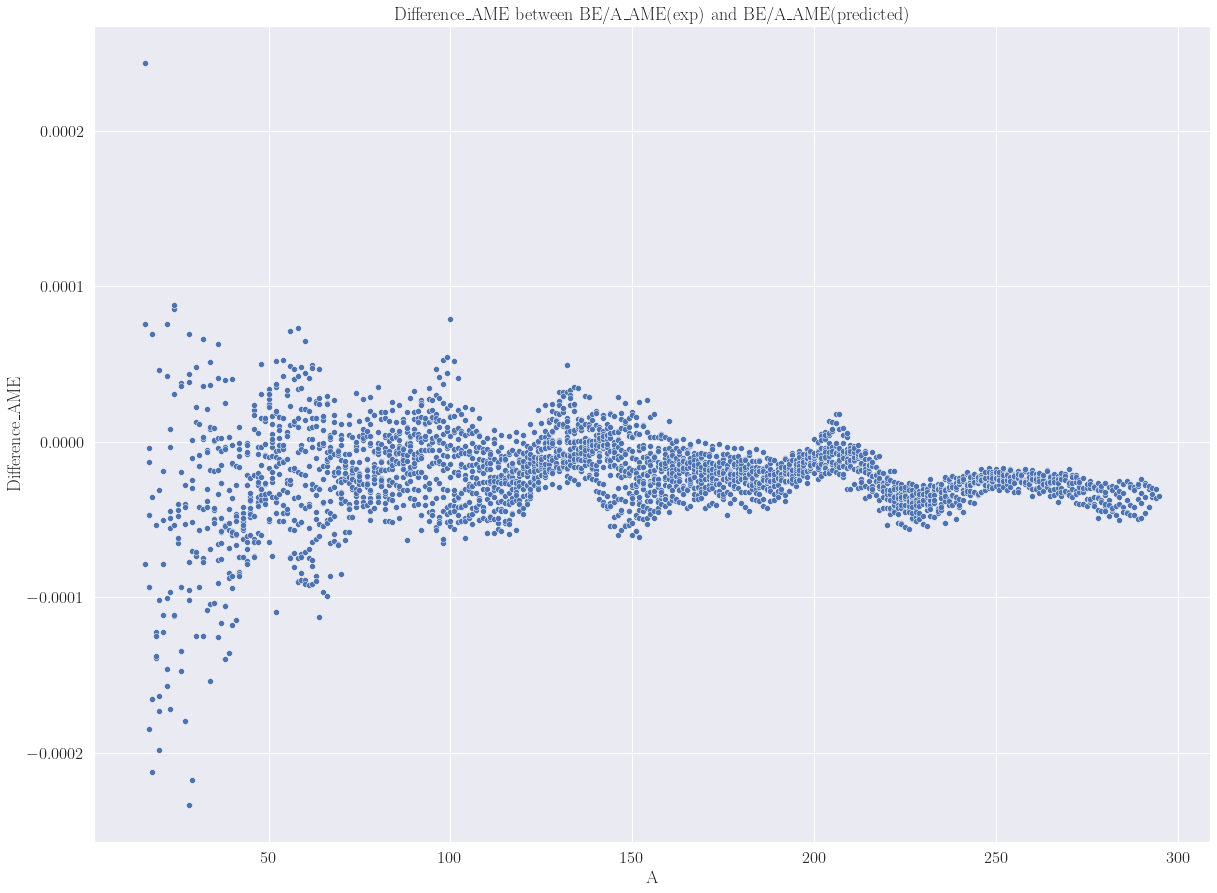

In [16]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE/A_Predictions"]=np.double(rescaled_predictions)
#df["BE/A_Predictions"]=df["BE/A_Predictions"]/1000
df["Difference_AME"]=df["BE/A_AME"]-df["BE/A_Predictions"]



plt.figure(figsize =(20,15))
#plt.autoscale()
plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.title('Difference_AME between BE/A_AME(exp) and BE/A_AME(predicted)')

sns.scatterplot(x="A",y="Difference_AME",data=df, palette="rainbow_r")

In [14]:
df['BE/A_DZ10']=df['BE/A_DZ10']/1000

test_target = df["BE/A_DZ10"]
test_n_input=df["N"]
test_z_input=df["Z"]

scaler=MinMaxScaler(feature_range=(0,1))
test_scaled_n=scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z=scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_target=scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))
predictions = model4.predict(x=([test_scaled_n,test_scaled_z]), batch_size=1, verbose=0) ## we use the model 4

<AxesSubplot:title={'center':'Difference_DZ10 between BE/A_DZ10(exp) and BE/A_DZ10(predicted)'}, xlabel='A', ylabel='Difference_AME'>

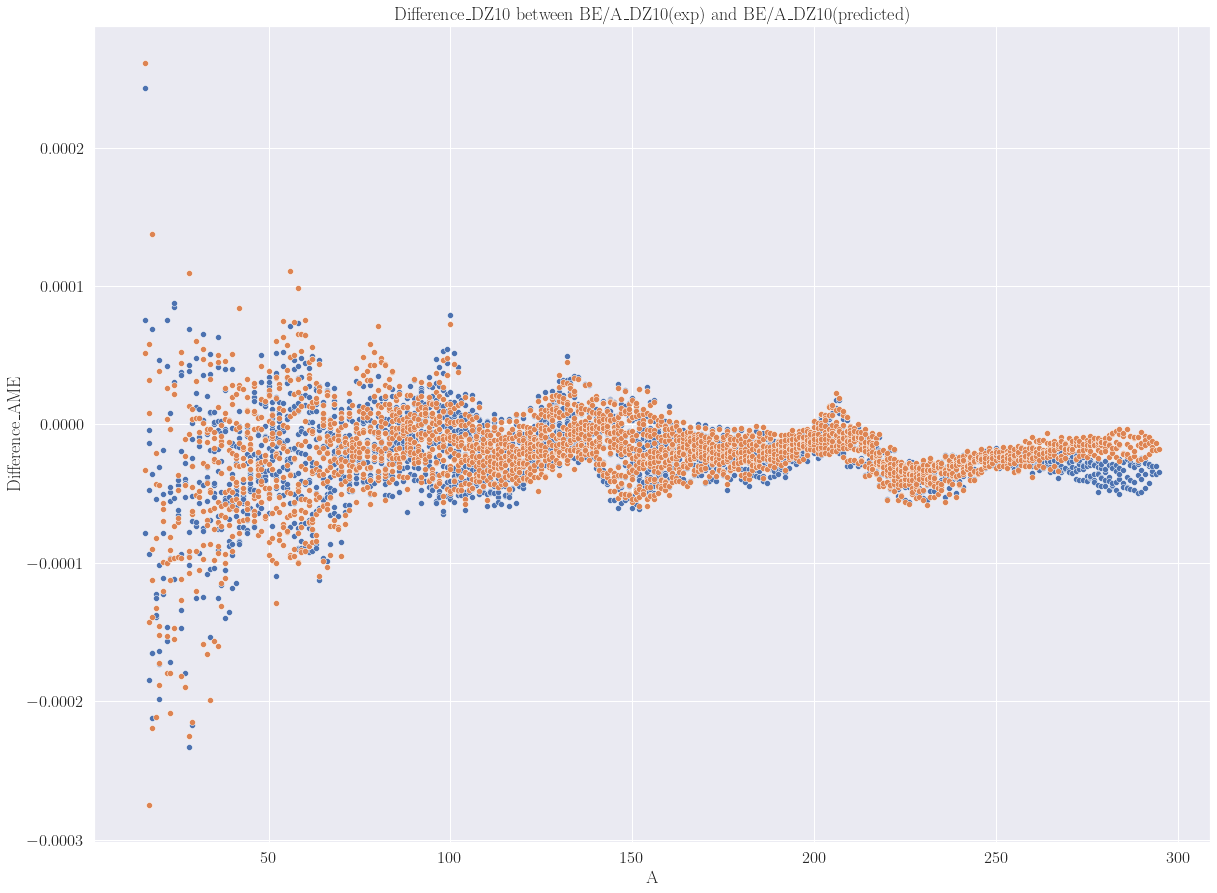

In [18]:
rescaled_predictions=[(i - scaler.min_)/scaler.scale_ for i in predictions]


df["BE/A_Predictions"]=np.double(rescaled_predictions)
#df["BE/A_Predictions"]=df["BE/A_Predictions"]/1000
df["Difference_DZ10"]=df["BE/A_DZ10"]-df["BE/A_Predictions"]



plt.figure(figsize =(20,15))
#plt.autoscale()
plt.rc('text', usetex=True)

plt.rc('font', family='serif')
plt.title('Difference_DZ10 between BE/A_DZ10(exp) and BE/A_DZ10(predicted)')

sns.scatterplot(x="A",y="Difference_AME",data=df, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_DZ10",data=df, palette="rainbow_r")